In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## WAPL/CTCF-AID

In [2]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'GO_BP' in x or 'Hallmarks' in x or 'pathways' in x]

gsea_data_6H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'CW_6H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_6H = pd.concat([gsea_data_6H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_6H.columns = ['NAME', 'SIZE', 'NES_6H', 'FDR_6H']

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'CW_24H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_24H', 'FDR_24H']

gsea_data_48H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'CW_48H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_48H = pd.concat([gsea_data_48H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_48H.columns = ['NAME', 'SIZE', 'NES_48H', 'FDR_48H']

gsea_data_96H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'CW_96H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_96H = pd.concat([gsea_data_96H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_96H.columns = ['NAME', 'SIZE', 'NES_96H', 'FDR_96H']

gsea_data = gsea_data_6H.merge(gsea_data_24H, on = ['NAME']).merge(gsea_data_48H, on = ['NAME']).merge(gsea_data_96H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

/tmp/ipykernel_237457/4204609205.py:32: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SIZE_x'} in the result is deprecated and will raise a MergeError in a future version.
  gsea_data = gsea_data_6H.merge(gsea_data_24H, on = ['NAME']).merge(gsea_data_48H, on = ['NAME']).merge(gsea_data_96H, on = ['NAME'])


,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_96H,FDR_96H
0,REACTOME_CYTOCHROME_P450_ARRANGED_BY_SUBSTRATE...,2.064820,0.004014,1.732442,0.243199,1.819083,0.018205,1.783134,0.035026
1,REACTOME_ARACHIDONIC_ACID_METABOLISM,2.003166,0.009649,1.806611,0.263205,1.587572,0.225709,1.621012,0.115767
2,REACTOME_ENDOGENOUS_STEROLS,1.952960,0.017063,1.595627,0.841791,1.632663,0.151576,1.583497,0.146850
3,REACTOME_PHASE_I_FUNCTIONALIZATION_OF_COMPOUNDS,1.916935,0.025843,1.576884,0.764079,1.543148,0.263567,1.413277,0.312840
4,REACTOME_CRMPS_IN_SEMA3A_SIGNALING,1.756771,0.262004,1.358997,0.924248,1.551041,0.259669,1.886490,0.010818


In [3]:
gsea_data_significant = gsea_data[(gsea_data['FDR_6H'] < 0.1) | (gsea_data['FDR_24H'] < 0.1)]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_6H'] != '---']
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_24H'] != '---']
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_48H'] != '---']
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_96H'] != '---']
gsea_data_significant['NES_6H'] = [float(x) for x in gsea_data_significant['NES_6H']]
gsea_data_significant['NES_24H'] = [float(x) for x in gsea_data_significant['NES_24H']]
gsea_data_significant['NES_48H'] = [float(x) for x in gsea_data_significant['NES_48H']]
gsea_data_significant['NES_96H'] = [float(x) for x in gsea_data_significant['NES_96H']]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_6H']*gsea_data_significant['NES_24H']>0]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_6H']*gsea_data_significant['NES_48H']>0]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_6H']*gsea_data_significant['NES_96H']>0]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_24H']*gsea_data_significant['NES_48H']>0]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_24H']*gsea_data_significant['NES_96H']>0]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_48H']*gsea_data_significant['NES_96H']>0]
gsea_data_significant.sort_values(['NES_24H'])

,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_96H,FDR_96H
9062,HALLMARK_MYC_TARGETS_V1,-1.684331,0.038017,-1.771499,0.008829,-2.813007,0.000000,-2.901517,0.000000
520,REACTOME_COMPLEX_I_BIOGENESIS,-1.905880,0.093765,-1.706248,0.524933,-1.698384,0.060589,-2.278437,0.000011
9079,HALLMARK_E2F_TARGETS,-0.750762,1.000000,-1.501774,0.056627,-2.600787,0.000000,-2.998294,0.000000
9063,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-1.541627,0.081160,-1.103162,0.430851,-2.115562,0.000000,-2.139740,0.000013
9034,HALLMARK_UV_RESPONSE_UP,1.560833,0.078102,1.336446,0.200247,1.230011,0.237302,1.591738,0.006649
1263,GOBP_VASCULAR_ENDOTHELIAL_GROWTH_FACTOR_PRODUC...,1.915305,0.076100,1.429661,0.470295,1.235538,0.484445,1.296250,0.252610
9035,HALLMARK_HYPOXIA,1.435638,0.191966,1.461483,0.093364,1.190400,0.276380,1.860991,0.000391
9033,HALLMARK_HEDGEHOG_SIGNALING,1.595398,0.082621,1.480132,0.089407,1.671230,0.008762,2.060301,0.000015
1258,GOBP_POSITIVE_REGULATION_OF_VASCULAR_ENDOTHELI...,1.996498,0.028038,1.528915,0.383619,1.326242,0.393890,1.383790,0.178146
1257,GOBP_SECONDARY_METABOLIC_PROCESS,2.008080,0.026749,1.546826,0.377303,1.619887,0.133355,1.925264,0.002906


In [4]:
terms_to_plot = ['GOBP_CELL_FATE_DETERMINATION', 'GOBP_STEM_CELL_PROLIFERATION', 'GOBP_MULTICELLULAR_ORGANISM_GROWTH',
                 'GOBP_EMBRYO_DEVELOPMENT', 'GOBP_EMBRYONIC_MORPHOGENESIS',
                 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_HEDGEHOG_SIGNALING',
                 'GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY', 'GOBP_REGULATION_OF_TRANSPORT',
                 'REACTOME_CELL_CYCLE']
gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
for col in gsea.columns[1:]:   
    gsea[col] = [float(x) for x in gsea[col]]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

/tmp/ipykernel_237457/4110865780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea[col] = [float(x) for x in gsea[col]]
/tmp/ipykernel_237457/4110865780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)


,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H,NES_48H,FDR_48H,NES_96H,FDR_96H
1654,GOBP_CELL_FATE_DETERMINATION,1.484662,0.453144,1.575889,0.335456,1.814607,0.047282,1.808231,0.010577
1981,GOBP_STEM_CELL_PROLIFERATION,1.377870,0.538874,1.277174,0.583492,1.577611,0.156152,1.701564,0.027297
2276,GOBP_MULTICELLULAR_ORGANISM_GROWTH,1.297630,0.616294,1.142360,0.692212,1.258217,0.459359,1.643585,0.041975
2195,GOBP_EMBRYO_DEVELOPMENT,1.317702,0.598157,1.285125,0.578799,1.328568,0.391448,1.736300,0.020160
1522,GOBP_EMBRYONIC_MORPHOGENESIS,1.541447,0.416328,1.547621,0.375723,1.612121,0.136896,1.979296,0.001459
9040,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.310208,0.240184,1.652263,0.021204,1.884289,0.001085,2.561752,0.000000
9032,HALLMARK_WNT_BETA_CATENIN_SIGNALING,1.777479,0.019952,1.902294,0.000714,1.775230,0.003495,1.848408,0.000460
9033,HALLMARK_HEDGEHOG_SIGNALING,1.595398,0.082621,1.480132,0.089407,1.671230,0.008762,2.060301,0.000015
3345,GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,1.086987,0.777290,1.258319,0.599610,1.533504,0.195353,2.053852,0.000540
3506,GOBP_REGULATION_OF_TRANSPORT,1.059172,0.799254,0.975430,0.846413,1.152734,0.581682,1.763299,0.016171


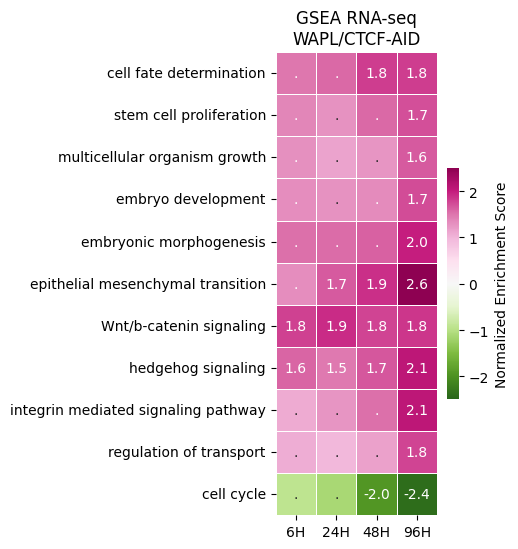

In [5]:
mask = gsea[['FDR_6H', 'FDR_24H', 'FDR_48H', 'FDR_96H']] >= 0.1
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_6H', 'NES_24H', 'NES_48H', 'NES_96H']].values.flatten())], (len(gsea), 4))

plt.figure(figsize = (5, 5.6))
plt.title('GSEA RNA-seq\nWAPL/CTCF-AID')
sns.heatmap(gsea[['NES_6H', 'NES_24H', 'NES_48H', 'NES_96H']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 2.5, xticklabels = ['6H', '24H', '48H', '96H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('myc ', 'MYC ').replace('e2f', 'E2F').replace('g2m', 'G2M').replace('p53', 'P53').replace('il6 jak stat3', 'IL6/JAK/STAT3').replace('tnfa', 'TNF-a').replace('nfkb', 'NF-kB').replace('wnt beta ', 'Wnt/b-') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.5, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.tight_layout()
plt.savefig('/DATA/users/magnitov/wapl_ctcf/rnaseq/rnaseq_gsea_cw.pdf', bbox_inches = 'tight')
plt.show()

## RAD21-AID

In [6]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'GO_BP' in x or 'pathways' in x or 'Hallmarks' in x]

gsea_data_6H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'RAD21_6H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_6H = pd.concat([gsea_data_6H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_6H.columns = ['NAME', 'SIZE', 'NES_6H', 'FDR_6H']

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'RAD21_24H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/wapl_ctcf/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_24H', 'FDR_24H']

gsea_data = gsea_data_6H.merge(gsea_data_24H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H
0,REACTOME_PHASE_I_FUNCTIONALIZATION_OF_COMPOUNDS,2.043889,0.029315,1.741372,0.064794
1,REACTOME_CYTOCHROME_P450_ARRANGED_BY_SUBSTRATE...,2.034431,0.017630,1.853598,0.020118
2,REACTOME_ARACHIDONIC_ACID_METABOLISM,1.915977,0.085184,1.82438,0.024220
3,REACTOME_EPHRIN_SIGNALING,1.880113,0.106516,1.678977,0.105112
4,REACTOME_ENDOGENOUS_STEROLS,1.852353,0.124110,1.767597,0.049032


In [7]:
gsea_data_significant = gsea_data[(gsea_data['FDR_6H'] < 0.1) | (gsea_data['FDR_24H'] < 0.1)]
gsea_data_significant['NES_6H'] = [float(x) for x in gsea_data_significant['NES_6H']]
gsea_data_significant['NES_24H'] = [float(x) for x in gsea_data_significant['NES_24H']]
gsea_data_significant.sort_values(['NES_24H'])

/tmp/ipykernel_237457/1080656859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea_data_significant['NES_6H'] = [float(x) for x in gsea_data_significant['NES_6H']]
/tmp/ipykernel_237457/1080656859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea_data_significant['NES_24H'] = [float(x) for x in gsea_data_significant['NES_24H']]


,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H
836,REACTOME_DNA_REPLICATION_PRE_INITIATION,-1.065401,0.980741,-2.418411,0.000000
613,REACTOME_DNA_REPLICATION,-1.446781,0.938213,-2.338941,0.000150
934,REACTOME_ASSEMBLY_OF_THE_PRE_REPLICATIVE_COMPLEX,-0.922015,1.000000,-2.312482,0.000147
9046,HALLMARK_MYC_TARGETS_V1,-1.333513,0.277400,-2.228577,0.000000
5659,GOBP_DNA_REPLICATION_INITIATION,-1.644318,0.856076,-2.185569,0.003573
...,...,...,...,...,...
1255,GOBP_OLEFINIC_COMPOUND_METABOLIC_PROCESS,2.188136,0.002770,1.919006,0.036059
9025,HALLMARK_P53_PATHWAY,1.250765,0.334926,1.930781,0.000358
433,REACTOME_COLLAGEN_FORMATION,0.769854,1.000000,1.942518,0.002739
336,REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_E...,0.900779,1.000000,1.970221,0.002444


In [9]:
terms_to_plot = ['REACTOME_SEPARATION_OF_SISTER_CHROMATIDS', 'REACTOME_MITOTIC_METAPHASE_AND_ANAPHASE', 
                 'GOBP_DNA_REPLICATION_INITIATION', 'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_E2F_TARGETS', 
                 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_APOPTOSIS', 'HALLMARK_P53_PATHWAY']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
for col in gsea.columns[1:]:   
    gsea[col] = [float(x) for x in gsea[col]]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

/tmp/ipykernel_237457/2427678358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea[col] = [float(x) for x in gsea[col]]
/tmp/ipykernel_237457/2427678358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)


,NAME,NES_6H,FDR_6H,NES_24H,FDR_24H
232,REACTOME_SEPARATION_OF_SISTER_CHROMATIDS,1.069796,0.915351,-1.775181,0.058410
270,REACTOME_MITOTIC_METAPHASE_AND_ANAPHASE,1.017181,0.939761,-1.758825,0.064277
5659,GOBP_DNA_REPLICATION_INITIATION,-1.644318,0.856076,-2.185569,0.003573
9030,HALLMARK_G2M_CHECKPOINT,1.118311,0.457003,-1.555287,0.024053
9040,HALLMARK_E2F_TARGETS,0.728452,0.996426,-2.138556,0.000506
9065,HALLMARK_MTORC1_SIGNALING,-0.810392,0.974245,-1.987408,0.000984
9036,HALLMARK_APOPTOSIS,1.024425,0.506980,1.614643,0.015859
9025,HALLMARK_P53_PATHWAY,1.250765,0.334926,1.930781,0.000358


/tmp/ipykernel_237457/1043317719.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


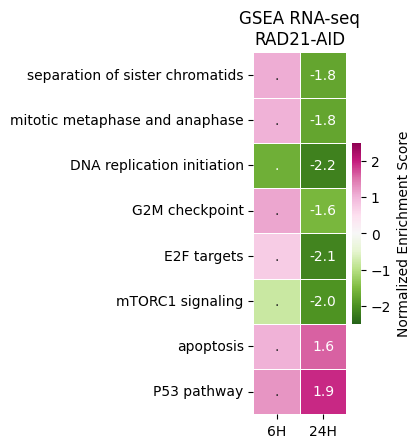

In [10]:
mask = gsea[['FDR_6H', 'FDR_24H']] >= 0.1
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_6H', 'NES_24H']].values.flatten())], (len(gsea), 2))

plt.figure(figsize = (1.5, 4.7))
plt.title('GSEA RNA-seq\nRAD21-AID')
sns.heatmap(gsea[['NES_6H', 'NES_24H']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 2.5, xticklabels = ['6H', '24H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('myc ', 'MYC ').replace('e2f', 'E2F').replace('g2m', 'G2M').replace('p53', 'P53').replace('dna', 'DNA').replace('mtorc1', 'mTORC1') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.5, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.tight_layout()
plt.savefig('/DATA/users/magnitov/wapl_ctcf/rnaseq/rnaseq_gsea_rad21.pdf', bbox_inches = 'tight')
plt.show()